# 자연어처리 과제 2 (5주차)
* 과제는 해당 .ipynb 파일에 코드 작성
    * 코드는 google colab의 gpu를 사용하는 런타임 환경에서 모두실행을 통해 한번에 실행 되어야함
    * 생성형 AI (ChatGPT, Copilot, Claude, ...) 등 사용 가능
        * 단, 사용시 사용한 방법, 입력, 출력을 캡처해 보고서에 기입
* Word를 통해 자유형식으로 보고서를 작성
    * 보고서의 양식은 자유
    * 보고서의 제출은 .pdf 형식으로 제출해야하며, 파일명은 "학번_이름_HW_??.pdf"로 제출 할 것
    * 보고서에 코드를 그대로 복붙 하지 말 것 (캡처 도구를 활용, 환경 설치 자료 참고)
* .ipynb와 .pdf 파일을 el을 통해 제출
    * 예시 : "2232036006_임상훈_HW_01.ipynb"와 "2232036006_임상훈_HW_01.pdf"를 제출

## 1. IMDB 데이터 처리 (20점)

* Stanford 대학에서 제공하는 IMDB 영화 리뷰 데이터(https://ai.stanford.edu/~amaas/data/sentiment/)를 다운 받아 학습, 테스트 데이터를 구성하시오

    * 데이터는 영어 텍스트 데이터로 긍정/부정의 Binary classification 데이터셋임
    * 데이터셋의 압축을 해제했을 떄의 각 디렉토리의 용도는 다음과 같음
        * train/pos : 긍정 label의 학습 데이터
        * train/neg : 부정 label의 학습 데이터
        * test/pos : 긍정 label의 테스트 데이터
        * test/neg : 부정 label의 테스트 데이터
    * 지금껏 배운 다양한 기법을 적용해 tokenizing, nomalizing 등을 진행한 후 vocab을 구축하여야함

**GRADING**
* 데이터셋 전처리를 통해 vocab 구축 (+20)

In [1]:
!tar -xzf /content/aclImdb_v1.tar.gz

# vsc에서 현재 경로에 aclImdb_v1.tar.gz 파일 존재할 경우
# !tar -xzf aclImdb_v1.tar.gz 

In [85]:
import torch
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)


## train data

In [86]:
import os

pos_reviews_path = os.path.join('aclImdb', 'train', 'pos')
neg_reviews_path = os.path.join('aclImdb', 'train', 'neg')

pos_review_files = os.listdir(pos_reviews_path)
neg_review_files = os.listdir(neg_reviews_path)

pos_reviews = []
neg_reviews = []

for file in pos_review_files:
    file_path = os.path.join(pos_reviews_path, file)
    with open(file_path, 'r') as f:
        pos_reviews.append(f.read())

for file in neg_review_files:
    file_path = os.path.join(neg_reviews_path, file)
    with open(file_path, 'r') as f:
        neg_reviews.append(f.read())

## test data

In [87]:
pos_test_reviews_path = os.path.join('aclImdb', 'test', 'pos')
neg_test_reviews_path = os.path.join('aclImdb', 'test', 'neg')

pos_review_files = os.listdir(pos_test_reviews_path)
neg_review_files = os.listdir(neg_test_reviews_path)

pos_test_reviews = []
neg_test_reviews = []

for file in pos_review_files:
    file_path = os.path.join(pos_test_reviews_path, file)
    with open(file_path, 'r') as f:
        pos_test_reviews.append(f.read())

for file in neg_review_files:
    file_path = os.path.join(neg_test_reviews_path, file)
    with open(file_path, 'r') as f:
        neg_test_reviews.append(f.read())

In [88]:
!pip install nltk

In [89]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaewoogwak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaewoogwak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preprocessing

In [93]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
st = PorterStemmer()

tokenized_train_dataset = []

# train
# 긍정 리뷰에 대해 불필요한 문자 제거
for data in pos_reviews:
    text = re.sub(r'<[^>]+>', '', data)  # HTML 태그 제거
    text = re.sub(r'[^\w\s]', '', text) # 불필요한 문자 제거 (문장부호만)
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens] # 소문자로 변환
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거
    tokens = [st.stem(word) for word in tokens] # stemming
    labels = 1
    tokenized_train_dataset.append((tokens, labels))

# 부정 리뷰에 대해 불필요한 문자 제거
for data in neg_reviews:
    text = re.sub(r'<[^>]+>', '', data)  # HTML 태그 제거
    text = re.sub(r'[^\w\s]', '', text) # 불필요한 문자 제거 (문장부호만)
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens] # 소문자로 변환
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거
    tokens = [st.stem(word) for word in tokens] # stemming
    labels = 0
    tokenized_train_dataset.append((tokens, labels))

len(tokenized_train_dataset)

25000

In [94]:
# test

tokenized_test_dataset = []

# 긍정 리뷰에 대해 불필요한 문자 제거
for data in pos_test_reviews:
    text = re.sub(r'<[^>]+>', '', data)  # HTML 태그 제거
    text = re.sub(r'[^\w\s]', '', text) # 불필요한 문자 제거 (문장부호만)
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens] # 소문자로 변환
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거
    # tokens = [st.stem(word) for word in tokens] # stemming
    labels = 1
    tokenized_test_dataset.append((tokens, labels))

# 부정 리뷰에 대해 불필요한 문자 제거
for data in neg_test_reviews:
    text = re.sub(r'<[^>]+>', '', data)  # HTML 태그 제거
    text = re.sub(r'[^\w\s]', '', text) # 불필요한 문자 제거 (문장부호만)
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens] # 소문자로 변환
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거
    # tokens = [st.stem(word) for word in tokens] # stemming
    labels = 0
    tokenized_test_dataset.append((tokens, labels))

len(tokenized_test_dataset)

25000

## Vocab 생성

In [95]:
from collections import Counter

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

# remove tokens that appear only twice or less
min_count = 2
cleaned_vocab = {"[PAD]":0, "[UNK]":1}
cleaned_vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count:
        cleaned_vocab[token] = cleaned_vocab_idx
        cleaned_vocab_idx += 1


In [96]:
len(cleaned_vocab)

29545

In [97]:
# make word2vec train data
# train.txt의 document의 토큰들 가져옴
word2vec_train_datas = []
for train_text, _ in tokenized_train_dataset:
    word2vec_train_datas.append([word for word in train_text])

print(word2vec_train_datas[0])
print(word2vec_train_datas[1])

['movi', 'get', 'respect', 'sure', 'lot', 'memor', 'quot', 'list', 'gem', 'imagin', 'movi', 'joe', 'piscopo', 'actual', 'funni', 'maureen', 'stapleton', 'scene', 'stealer', 'moroni', 'charact', 'absolut', 'scream', 'watch', 'alan', 'skipper', 'hale', 'jr', 'polic', 'sgt']
['bizarr', 'horror', 'movi', 'fill', 'famou', 'face', 'stolen', 'cristina', 'rain', 'later', 'tv', 'flamingo', 'road', 'pretti', 'somewhat', 'unstabl', 'model', 'gummi', 'smile', 'slate', 'pay', 'attempt', 'suicid', 'guard', 'gateway', 'hell', 'scene', 'rain', 'model', 'well', 'captur', 'mood', 'music', 'perfect', 'deborah', 'raffin', 'charm', 'cristina', 'pal', 'rain', 'move', 'creepi', 'brooklyn', 'height', 'brownston', 'inhabit', 'blind', 'priest', 'top', 'floor', 'thing', 'realli', 'start', 'cook', 'neighbor', 'includ', 'fantast', 'wick', 'burgess', 'meredith', 'kinki', 'coupl', 'sylvia', 'mile', 'beverli', 'dangelo', 'diabol', 'lot', 'eli', 'wallach', 'great', 'fun', 'wili', 'polic', 'detect', 'movi', 'nearli', '

In [98]:
from gensim.models import Word2Vec

# call CBOW or SkipGram
# CBOW_W2V = Word2Vec(sentences = word2vec_train_datas, vector_size = 32, window = 5, min_count = 1, workers = 4, sg = 0)
SkipGram_W2V = Word2Vec(sentences = word2vec_train_datas, vector_size = 200, window = 10, min_count = 1, workers = 4, sg = 1)

In [99]:
import numpy as np

# make embedding lookup matrix
embedding_list = []

for token, idx in cleaned_vocab.items():
    if token in SkipGram_W2V.wv:
        embedding_list.append(SkipGram_W2V.wv[token])
    elif token == "[PAD]":
        embedding_list.append(np.zeros(SkipGram_W2V.wv.vectors.shape[1]))
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1]))
    else:
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1]))

embedding_loopup_matrix = np.vstack(embedding_list)


# vocab의 단어가 임베딩 테이블에 모두 잘 들어감
print(embedding_loopup_matrix.shape)
print(len(cleaned_vocab))

(29545, 200)
29545


In [100]:
!pip install wandb

In [101]:
!pip install lightning

In [102]:
from torch.utils.data import Dataset, DataLoader

# define dataset class
class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = int(self.data[index][1])
        tokens = self.data[index][0]

        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        if len(token_ids) > 100:
            token_ids = token_ids[:100]
        else: # 100토큰보다 짧으면 패드토큰만큼 추가해서 길이 맞춰줌. 임의의 토큰은 의미가지면 안돼서 패드 토큰 추가해줌
        # 가장 긴 길이가 97이었다? 숫자 조정하면 성능 향상
            token_ids = token_ids[:100] + [0] * (100 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [103]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

### Accelerator 이슈

M1 맥북 에어 로컬 환경에서 실행하여 mps로 설정하였고 num_workers=4도 지워서 실행하였습니다.

과제 제출은 코드가 돌아가야하기 때문에 다시 num_workers=4, acclerator=gpu로 바꾸어 제출합니다.

In [122]:
import wandb
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import ModelSummary

wandb.login()

def check_vocab_properties(vocab):
    print(f"Vocab size: {len(vocab)}")
    print(f"Vocab items: {list(vocab.items())[:5]}")


def check_performance(model, vocab,train_data, test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP", name=wandb_log_name, group="hw3")

    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(test_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(
        max_epochs=4,
        accelerator="gpu",
        logger=wandb_logger,
        callbacks=[ModelSummary(max_depth=2)]
    )

    trainer.fit(
        model=pl_model,
        train_dataloaders=train_loader,
        val_dataloaders=val_loader
    )

    trainer.test(dataloaders=test_loader)

    wandb.finish()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


## 2. 데이터셋 통계 분석 (30점)
* 1에서 처리한 vocab을 통해 tokenizing 된 데이터셋의 여러 통계를 계산하시오
    * 통계의 예시
        * 학습/테스트 문서의 수
        * 학습/테스트 데이터의 평균 token 수
        * 데이터의 token histogram
        * 학습/테스트에서의 unk token의 수
        * 각 token의 빈도 그래프
        * 긍정/부정의 token 빈도 차이
        * 긍정/부정의 frequent/rare token

* 이전 실습까지 사용한 코드 및 검색을 활용하여 최소 1개의 그래프를 그려야 함

**GRADING**
* 분석한 통계의 수 (+5)

In [105]:
token_counter.most_common(10)

[('movi', 49581),
 ('film', 46295),
 ('one', 26314),
 ('like', 22059),
 ('time', 15079),
 ('good', 14711),
 ('make', 14497),
 ('get', 14022),
 ('charact', 13797),
 ('see', 13767)]

## 훈련 데이터 토큰 빈도 수

In [106]:
import matplotlib.pyplot as plt

def plot_frequency_distribution(counter):
    plt.plot(counter.values())
    plt.ylabel('Token Frequency')
    plt.show()

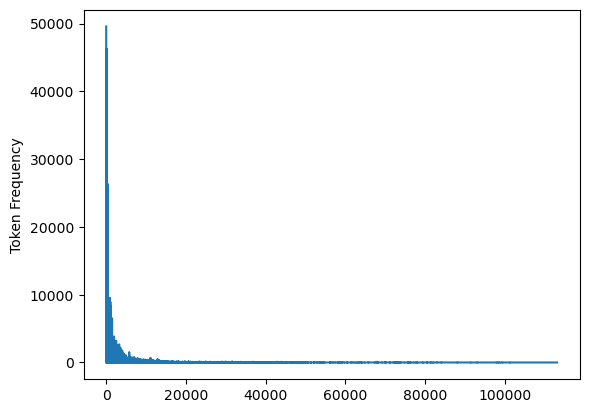

In [107]:
plot_frequency_distribution(token_counter)


## 학습/테스트 데이터 문서의 수

In [108]:
# 학습/테스트 문서의 수
num_train_docs = len(pos_reviews) + len(neg_reviews)
num_test_docs = len(pos_test_reviews) + len(neg_test_reviews)

print("Training 데이터 문서 수:", num_train_docs)
print("Test 데이터 문서 수:", num_test_docs)

Training 데이터 문서 수: 25000
Test 데이터 문서 수: 25000


## 학습/테스트 데이터의 평균 token 수

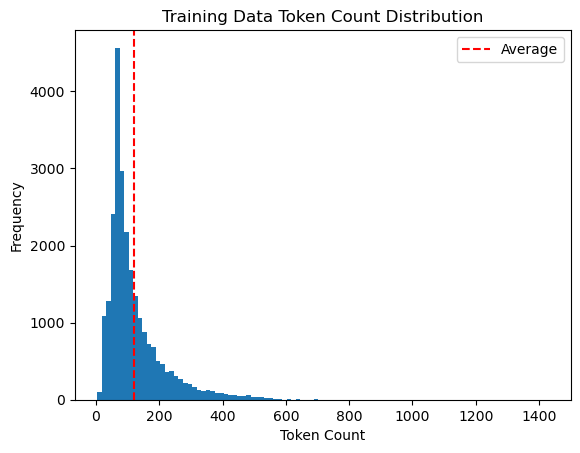

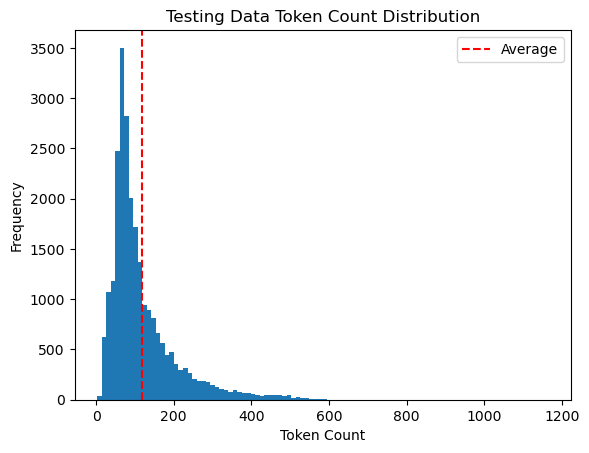

Training data 평균 token 수: 121.16
Test data 평균 token 수: 118.39448


In [109]:
# 학습/테스트 데이터의 평균 token 수
train_token_counts = [len(tokens) for tokens, label in tokenized_train_dataset]
test_token_counts = [len(tokens) for tokens, label in tokenized_test_dataset]

avg_train_token_count = sum(train_token_counts) / num_train_docs
avg_test_token_count = sum(test_token_counts) / num_test_docs

import matplotlib.pyplot as plt

plt.hist(train_token_counts, bins=100)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Training Data Token Count Distribution')
plt.axvline(x=avg_train_token_count, color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

plt.hist(test_token_counts, bins=100)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Testing Data Token Count Distribution')
plt.axvline(x=avg_test_token_count, color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

print("Training data 평균 token 수:", avg_train_token_count)
print("Test data 평균 token 수:", avg_test_token_count)


## 훈련 데이터의 token histogram

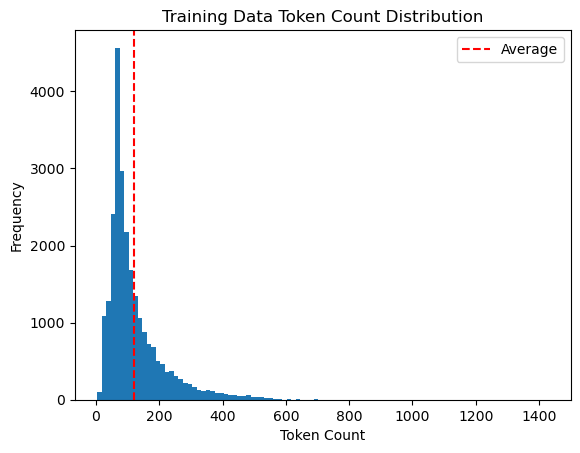

In [110]:
plt.hist(train_token_counts, bins=100)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Training Data Token Count Distribution')
plt.axvline(x=avg_train_token_count, color='red', linestyle='--', label='Average')
plt.legend()
plt.show()


## 테스트 데이터의 token histogram

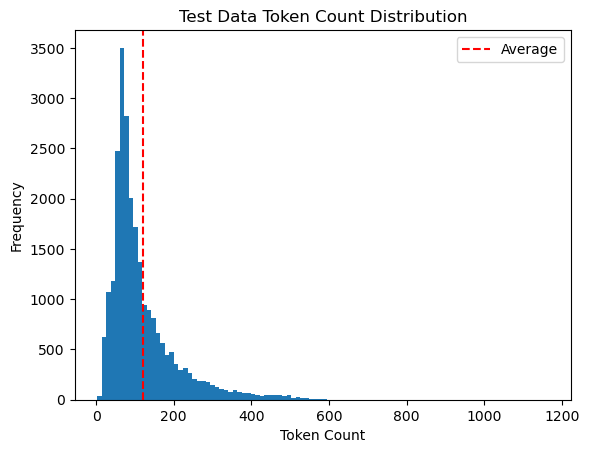

In [111]:
plt.hist(test_token_counts, bins=100)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Test Data Token Count Distribution')
plt.axvline(x=avg_train_token_count, color='red', linestyle='--', label='Average')
plt.legend()
plt.show()


## 학습 데이터에서 unk token의 수

In [112]:
check_vocab_properties(cleaned_vocab)

Vocab size: 29545
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('movi', 2), ('get', 3), ('respect', 4)]


In [113]:
count = 0
total = 0
v = []

for tokens, _ in tokenized_train_dataset:
  for token in tokens:
    total += 1
    try:
      v.append(cleaned_vocab[token])
    except KeyError:
      count+=1


print("훈련 데이터에서 unk token 수")
print("unk", count)
print("not unk", len(v))
print("total", total)
print("unk+not unk", count + len(v))


훈련 데이터에서 unk token 수
unk 94125
not unk 2934875
total 3029000
unk+not unk 3029000


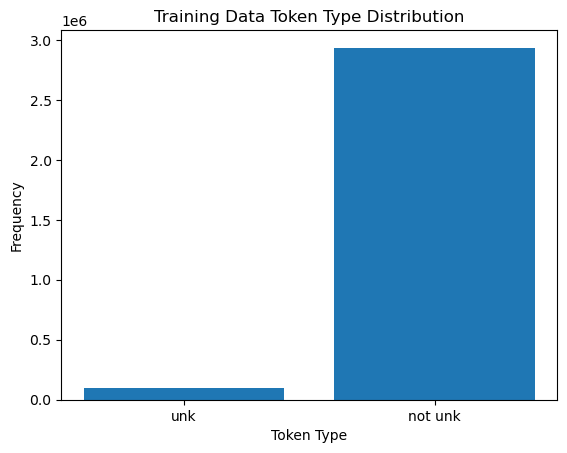

In [114]:
# prompt: unk토큰과 not unk토큰으로 그래프 그려줘

plt.bar(['unk', 'not unk'], [count, len(v)])
plt.xlabel('Token Type')
plt.ylabel('Frequency')
plt.title('Training Data Token Type Distribution')
plt.show()


## 테스트 데이터에서 unk 토큰의 수

In [115]:
count = 0
total = 0
v = []

for tokens, _ in tokenized_test_dataset:
  for token in tokens:
    total += 1
    try:
      v.append(cleaned_vocab[token])
    except KeyError:
      count+=1


print("테스트 데이터에서 unk token 수")
print("unk", count)
print("not unk", len(v))
print("total", total)
print("unk+not unk", count + len(v))


테스트 데이터에서 unk token 수
unk 1415539
not unk 1544323
total 2959862
unk+not unk 2959862


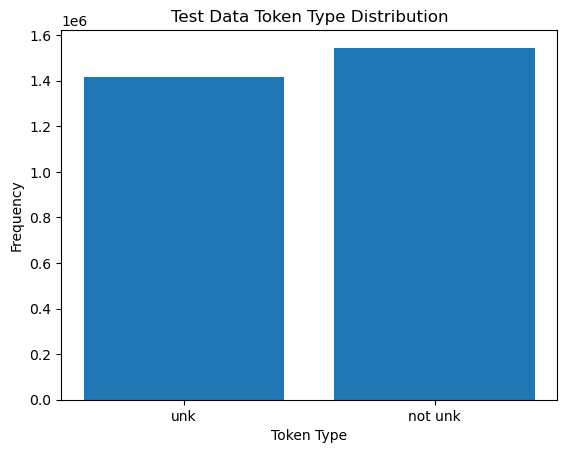

In [116]:
plt.bar(['unk', 'not unk'], [count, len(v)])
plt.xlabel('Token Type')
plt.ylabel('Frequency')
plt.title('Test Data Token Type Distribution')
plt.show()


## 긍정/부정 토큰 빈도 차이

In [117]:
print(tokenized_train_dataset[0])

pos = 0
neg = 0

pos_tokens = []
neg_tokens = []
for tokens, label in tokenized_train_dataset:
  for token in tokens:
    if label == 1:
      pos_tokens.append(token)

    else:
      neg_tokens.append(token)

print("pos", len(pos_tokens), "neg", len(neg_tokens))
print("pos_tokens", pos_tokens[:20])
print("neg_toekns", neg_tokens[:20])

(['movi', 'get', 'respect', 'sure', 'lot', 'memor', 'quot', 'list', 'gem', 'imagin', 'movi', 'joe', 'piscopo', 'actual', 'funni', 'maureen', 'stapleton', 'scene', 'stealer', 'moroni', 'charact', 'absolut', 'scream', 'watch', 'alan', 'skipper', 'hale', 'jr', 'polic', 'sgt'], 1)
pos 1539460 neg 1489540
pos_tokens ['movi', 'get', 'respect', 'sure', 'lot', 'memor', 'quot', 'list', 'gem', 'imagin', 'movi', 'joe', 'piscopo', 'actual', 'funni', 'maureen', 'stapleton', 'scene', 'stealer', 'moroni']
neg_toekns ['work', 'one', 'best', 'shakespear', 'sourc', 'film', 'manag', 'credit', 'sourc', 'whilst', 'still', 'appeal', 'wider', 'audiencebranagh', 'steal', 'film', 'fishburn', 'nose', 'there', 'talent']


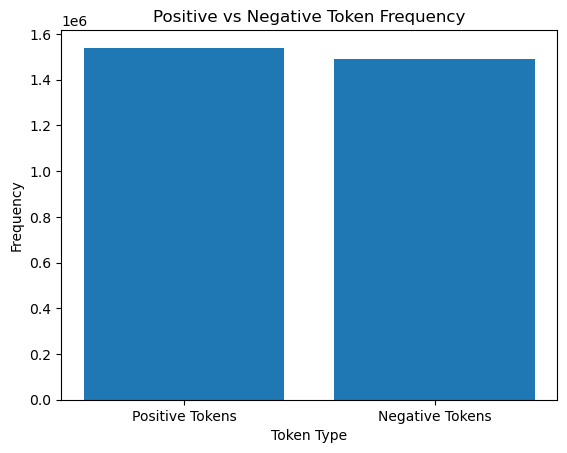

In [118]:
# prompt: 긍정 부정 토큰 빈도 수로 그래프 그려줘

plt.bar(['Positive Tokens', 'Negative Tokens'], [len(pos_tokens), len(neg_tokens)])
plt.xlabel('Token Type')
plt.ylabel('Frequency')
plt.title('Positive vs Negative Token Frequency')
plt.show()


## 긍정/부정의 frequent/rare 빈도 차이

In [127]:
pos_token_counter = Counter(pos_tokens)
neg_token_counter = Counter(neg_tokens)

print("Positive Tokens")
print(pos_token_counter.most_common(10))
print("Negative Tokens")
print(neg_token_counter.most_common(10))


Positive Tokens
[('film', 24398), ('movi', 21784), ('one', 13506), ('like', 10091), ('time', 7882), ('good', 7478), ('see', 7251), ('stori', 7187), ('charact', 6867), ('make', 6662)]
Negative Tokens
[('movi', 27797), ('film', 21897), ('one', 12808), ('like', 11968), ('make', 7835), ('even', 7603), ('get', 7602), ('good', 7233), ('time', 7197), ('watch', 7181)]


In [128]:
# prompt: 긍정/부정 토큰 상위 10개씩 그래프로 그려줘

def plot_token_frequency(counter, title):
    tokens, counts = zip(*counter.most_common(10))
    plt.bar(tokens, counts)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()
    

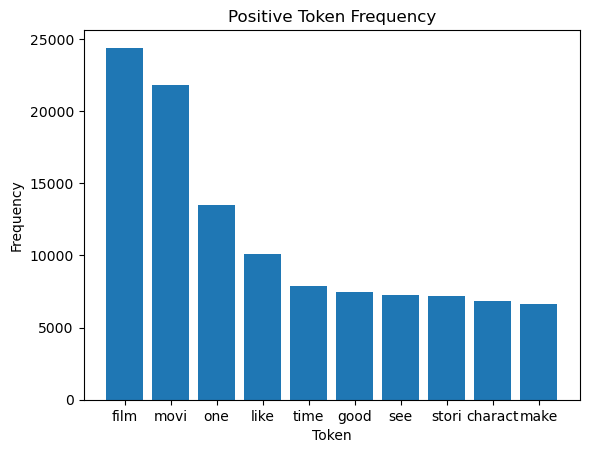

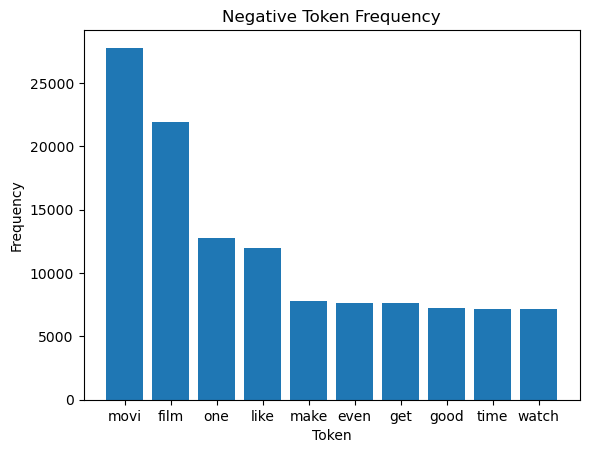

In [129]:
plot_token_frequency(pos_token_counter, 'Positive Token Frequency')
plot_token_frequency(neg_token_counter, 'Negative Token Frequency')


In [131]:
# rare token 확인

pos_token_counter = Counter(pos_tokens)
neg_token_counter = Counter(neg_tokens)

print("Positive Tokens")
print(pos_token_counter.most_common()[-10:])
print("Negative Tokens")
print(neg_token_counter.most_common()[-10:])


Positive Tokens
[('athinodoro', 1), ('prousali', 1), ('stavro', 1), ('nikolaidi', 1), ('serieseven', 1), ('tvin', 1), ('ant1', 1), ('zoneswel', 1), ('imi', 1), ('jayden', 1)]
Negative Tokens
[('resultso', 1), ('afleck', 1), ('giglii', 1), ('parodywith', 1), ('repleat', 1), ('jowl', 1), ('funnythrow', 1), ('camora', 1), ('capich', 1), ('mj', 1)]


## 3. Classification 모델 구축 및 학습 (50점)
* 이론 및 실습 수업을 통해 배운 MLP, CNN, RNN을 사용하여 각자의 모델을 구축하시오
    * 모델의 크기는 ModelSummary 기준 500MB의 메모리를 초과하면 안됨
    * 모델은 최대 10 epoch 학습 할 수 있음 (적게 학습하는 것은 ok)
* 최대한 높은 성능을 기록하는 모델을 구축하여야 함
    * 학습엔 주어진 학습 데이터만을 사용하여야 함
    * 테스트 데이터를 학습에 사용하면 0점
* 모델 구성에 있어 왜 자신이 그런 모델 구조를 설계 하였는지 설명을 하여야함

**GRADING**
* 모델 구축 및 학습 (+20)
* 모델에 대한 설명 (+10)
* 모델 성능에 따른 성적
    * 상위 0~30% :  +20
    * 상위 30~50% :  +15
    * 상위 50~70% :  +10
    * 상위 70~100% : +5

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, vocab_size):
        super(MLP, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix), freeze=False)
        self.fc1 = nn.Linear(200 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x) # 입력은 (2,100), 임베딩 레이어는 32로 (2, 100, 32)
        x = x.view(-1, 200 * 100) # 2, 3200으로 만들어줌 why?) fc1이 (3200, 100)이므로!
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [34]:
mlp_model = MLP(len(cleaned_vocab))


In [35]:
check_performance(mlp_model, cleaned_vocab, tokenized_train_dataset, tokenized_test_dataset, "mlp")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer 

INFO: 
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | MLP              | 7.9 M 
1 | model.embedding | Embedding        | 5.9 M 
2 | model.fc1       | Linear           | 2.0 M 
3 | model.fc2       | Linear           | 202   
4 | loss            | CrossEntropyLoss | 0     
-----------------------------------------------------
7.9 M     Trainable params
0         Non-trainable params
7.9 M     Total params
31.637    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | MLP              | 7.9 M 
1 | model.embedding | Embedding        | 5.9 M 
2 | model.fc1       | Linear           | 2.0 M 
3 | model.fc2       | Linear           | 202   
4 | loss            | CrossEntropyLoss | 0     
-----------------------------------------------------
7.9 M     Trainable par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP/5tda1a0e/checkpoints/epoch=0-step=391.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP/5tda1a0e/checkpoints/epoch=0-step=391.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP/5tda1a0e/checkpoints/epoch=0-step=391.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP/5tda1a0e/checkpoints/epoch=0-step=391.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │     0.370920330286026     │
│       test_accuracy       │    0.8328400254249573     │
│         test_loss         │    0.3710031509399414     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁▁▁▁▁▁▁▁████████
test_accuracy,▁
test_loss,▁
train_loss,██▇▆▅▆▅▂▂▂▄▁▃▂
trainer/global_step,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
val_accuracy,▁
val_loss,▁
avg_test_loss,0.37092
avg_val_loss,0.37092


### Best Accuracy Model: TextCNN

In [123]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size):
        super(TextCNN, self).__init__()
        self.SG_embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix), freeze=True)
        self.RD_embedding = nn.Embedding(vocab_size, 200)

        self.SG_conv1 = nn.Conv2d(1, 200, (3, 200))
        self.SG_conv2 = nn.Conv2d(1, 200, (4, 200))
        self.SG_conv3 = nn.Conv2d(1, 200, (5, 200))

        self.RD_conv1 = nn.Conv2d(1, 200, (3, 200))
        self.RD_conv2 = nn.Conv2d(1, 200, (4, 200))
        self.RD_conv3 = nn.Conv2d(1, 200, (5, 200))

        self.fc = nn.Linear(6*200, 2)


    def forward(self, x):
        SG_embedding = self.SG_embedding(x).unsqueeze(1)
        # 2,1,200,200 -> 채널축을 1로 써줌, cnn쓰기위함
        RD_embedding = self.RD_embedding(x).unsqueeze(1)

        SG_conv1_feature = F.relu(self.SG_conv1(SG_embedding).squeeze(3))
        
        SG_conv2_feature = F.relu(self.SG_conv2(SG_embedding).squeeze(3))
        
        SG_conv3_feature = F.relu(self.SG_conv3(SG_embedding).squeeze(3))

        RD_conv1_feature = F.relu(self.RD_conv1(RD_embedding).squeeze(3))
        RD_conv2_feature = F.relu(self.RD_conv2(RD_embedding).squeeze(3))
        RD_conv3_feature = F.relu(self.RD_conv3(RD_embedding).squeeze(3))

        SG_max1 = F.max_pool1d(SG_conv1_feature, SG_conv1_feature.size(2)).squeeze(2)
        SG_max2 = F.max_pool1d(SG_conv2_feature, SG_conv2_feature.size(2)).squeeze(2)
        SG_max3 = F.max_pool1d(SG_conv3_feature, SG_conv3_feature.size(2)).squeeze(2)

        RD_max1 = F.max_pool1d(RD_conv1_feature, RD_conv1_feature.size(2)).squeeze(2)
        RD_max2 = F.max_pool1d(RD_conv2_feature, RD_conv2_feature.size(2)).squeeze(2)
        RD_max3 = F.max_pool1d(RD_conv3_feature, RD_conv3_feature.size(2)).squeeze(2)

        x = torch.cat([SG_max1, SG_max2, SG_max3, RD_max1, RD_max2, RD_max3], dim=1)

        x = self.fc(x)

        return x

        # cnn을 쓰면 파라미터 용량은 줄어들지만 성능 하락?

In [39]:
textcnn_model = TextCNN(len(cleaned_vocab))

In [40]:
check_performance(textcnn_model, cleaned_vocab, tokenized_train_dataset, tokenized_test_dataset, "textcnn")

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name               | Type             | Params
---------------------------------------------------------
0  | model              | TextCNN          | 18.0 M
1  | model.SG_embedding | Embedding        | 8.5 M 
2  | model.RD_embedding | Embedding        | 8.5 M 
3  | model.SG_conv1     | Conv2d           | 120 K 
4  | model.SG_conv2     | Conv2d           | 160 K 
5  | model.SG_conv3     | Conv2d           | 200 K 
6  | model.RD_conv1     | Conv2d           | 120 K 
7  | model.RD_conv2     | Conv2d           | 160 K 
8  | model.RD_conv3     | Conv2d           | 200 K 
9  | model.fc           | Linear           | 2.4 K 
10 | loss               | CrossEntropyLoss | 0     
---------------------------------------------------------
9.5 M     Trainable params
8.5 M     Non-trainable params
18.0 M    Total params
72.070    Total estimated model params si

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=4` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.
INFO: Restoring states from the checkpoint path at ./NLP/c0t15gx1/checkpoints/epoch=3-step=1564.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP/c0t15gx1/checkpoints/epoch=3-step=1564.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP/c0t15gx1/checkpoints/epoch=3-step=1564.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP/c0t15gx1/checkpoints/epoch=3-step=1564.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.3879658579826355     │
│       test_accuracy       │    0.8605599999427795     │
│         test_loss         │    0.3877664804458618     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,█▁▂▄
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆█
test_accuracy,▁
test_loss,▁
train_loss,█▅▆▇▅▅▇▄▃▃▃▄▄▄▄▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
val_accuracy,▁▇▇█
val_loss,█▁▂▄
avg_test_loss,0.38797
avg_val_loss,0.38797
